In [3]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

In [4]:
df = pd.read_csv(r"https://raw.githubusercontent.com/pik1989/MLProject-ChurnPrediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Droping the first Column as we know customerId not generate any insights.

In [4]:
df.drop(columns = ['customerID'], inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 20)

In [7]:
df.ndim

2

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* Colunm name "Total Charges" should have int or float data type
* Converting object data type to float data type

In [10]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

* Senior Citizen is aslo a Categrocial variable not a integer, it should also converted into categorical datatype.

In [11]:
df['SeniorCitizen'] = df.SeniorCitizen.astype('category')

In [12]:
df.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [13]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


Text(0.5, 1.0, 'Count of TARGET Variable per category')

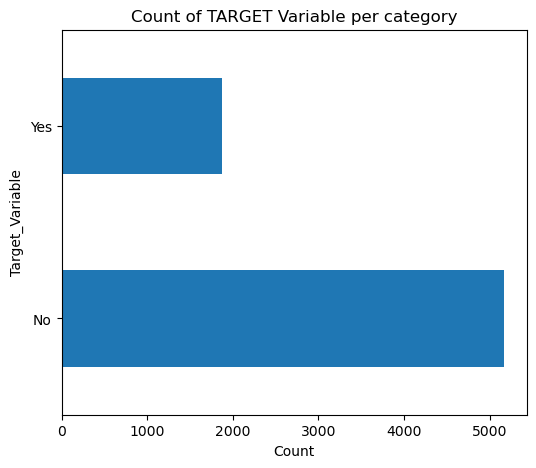

In [14]:
df['Churn'].value_counts().plot(kind= 'barh', figsize= (6, 5))
plt.xlabel('Count')
plt.ylabel('Target_Variable')
plt.title('Count of TARGET Variable per category')

In [15]:
100*df['Churn'].value_counts()/df['Churn'].count()

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

* Highly Unbalanced Data raito is 73:27

* Checking for Null values 

In [16]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Column "TotalCharges" have 11 Null values, as it is obvisious 11 rows are insignificent out of 7043 rows, so we can drop those data points.

In [17]:
# Lets see where is those 11 Null values.
df.loc[df.TotalCharges.isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
df.dropna(axis = 0, how = 'any',inplace = True) #Droping the rows which having null values.

In [19]:
df.isnull().sum()    # No null value is there.

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

**Univarient Analysis**

* Here int or float type columns are droped for ploting against Churn, remaining columns are categorical type varible so, plot them against the Churn to see the effect of each columns with churning of customer.

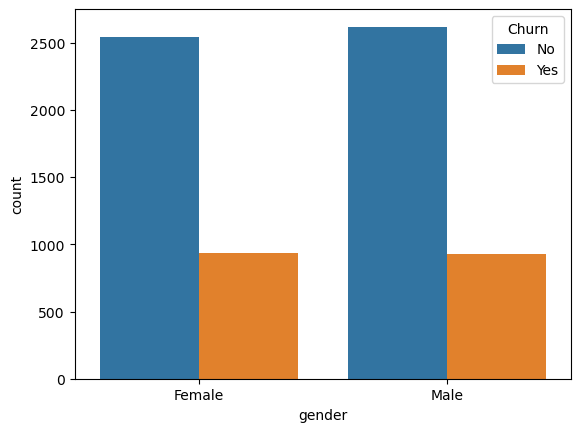

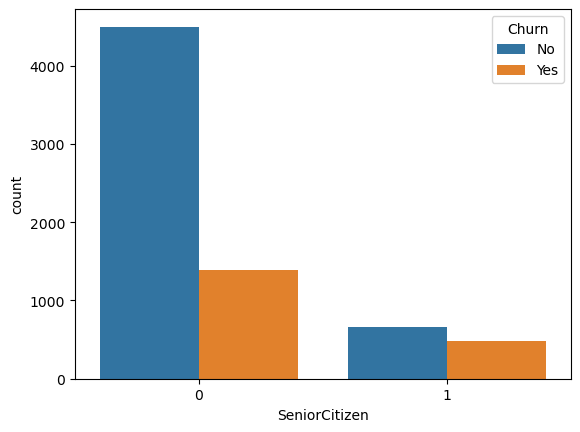

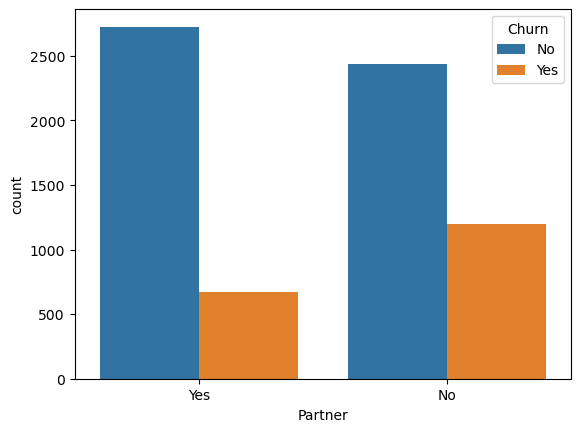

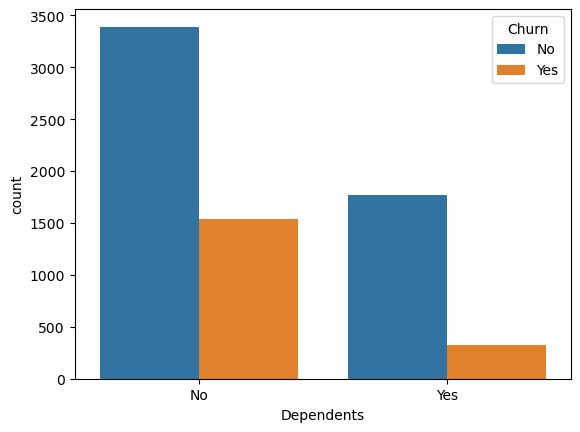

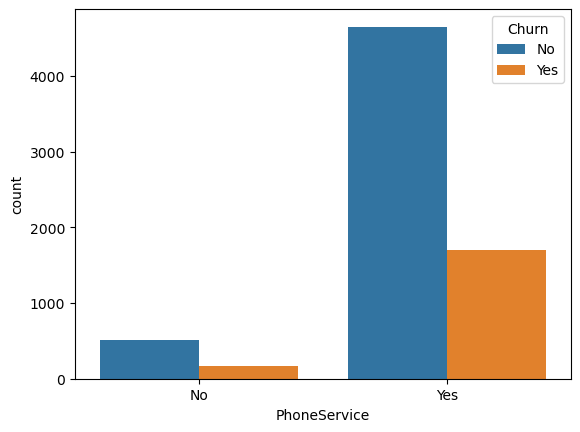

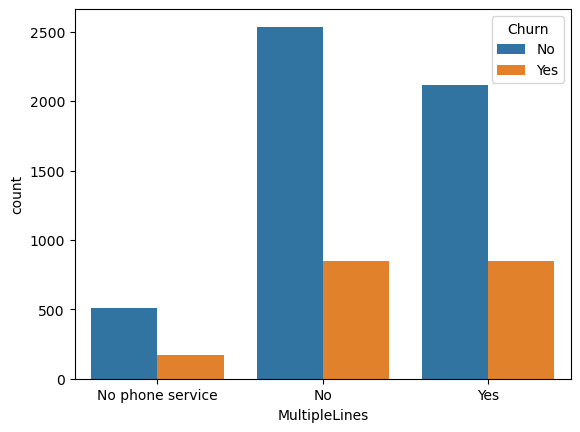

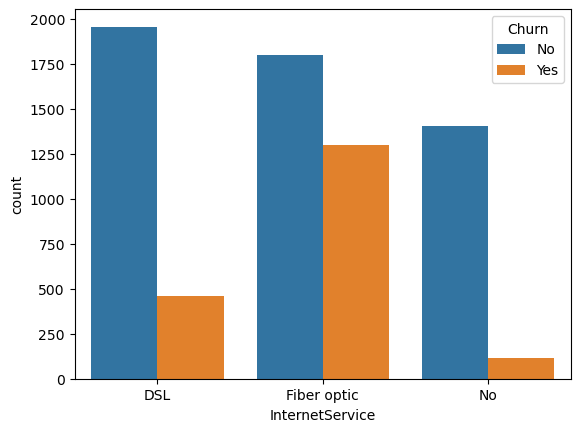

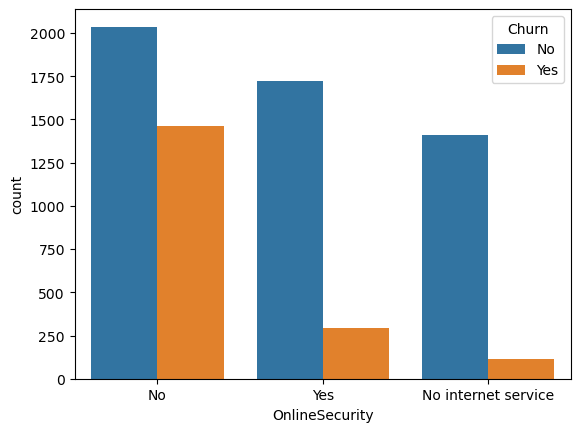

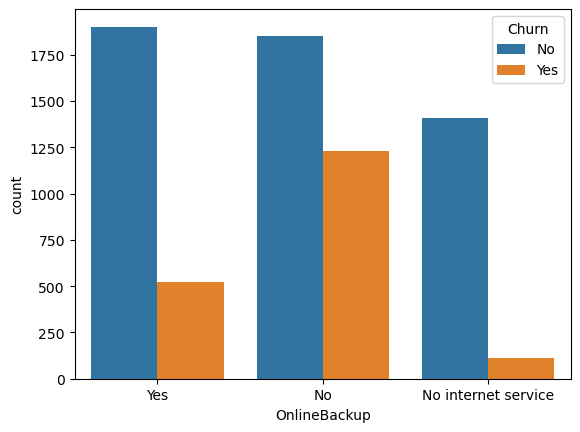

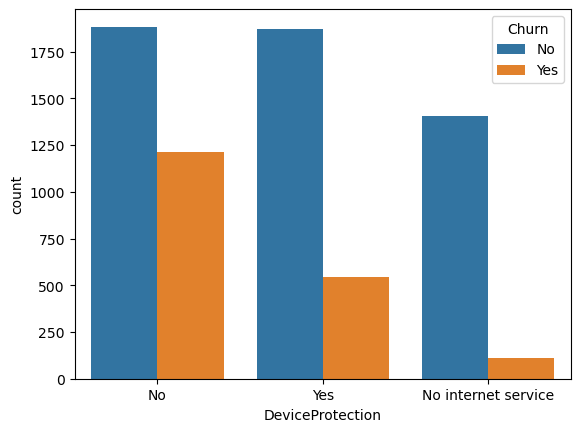

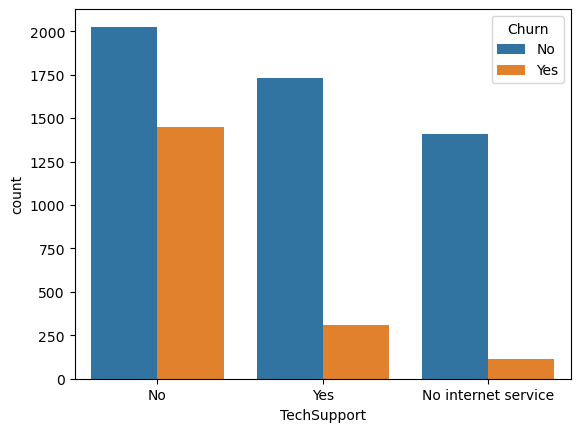

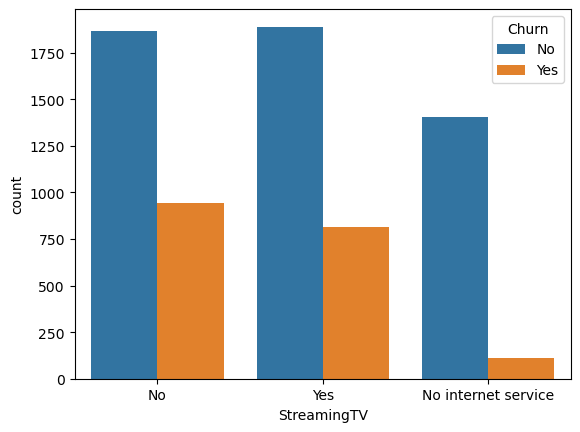

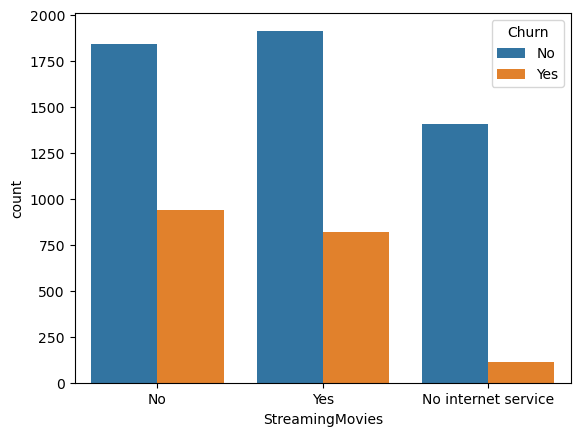

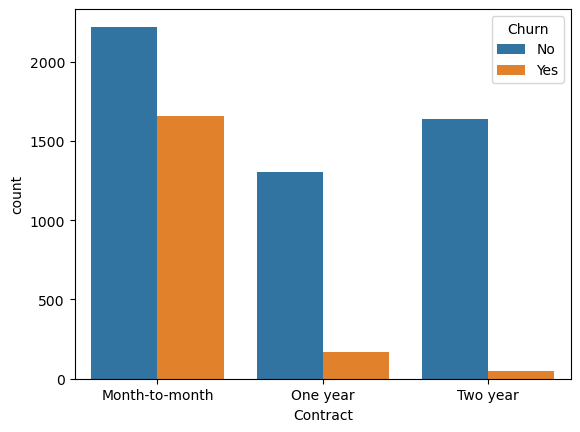

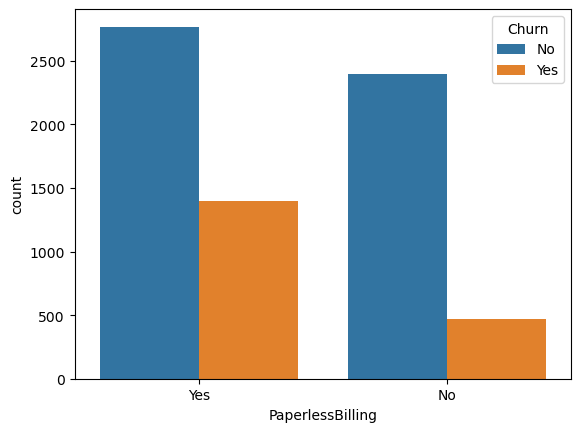

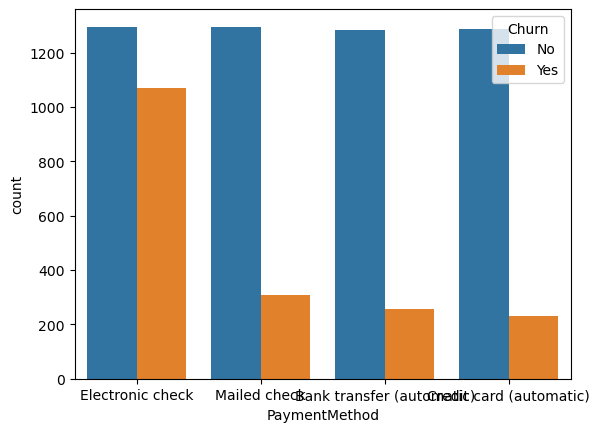

In [21]:
for i, j in enumerate(df.drop(columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])):
    plt.figure(i)
    sb.countplot(data=df, x = j, hue = 'Churn')

* Divide The Tenure column in yearwise groups.

In [22]:
print(df.tenure.max(),  df.tenure.min())  #Finding max & min value for tenure

72 1


In [23]:
labels = ['{0}-{1}'.format(i, i+11) for i in range(1, 72, 12)]
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right = False, labels= labels)

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [25]:
df.drop(columns = ['tenure'], axis = 1, inplace = True)

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


* Turn target variable 'Churn' in binary numeric column

In [27]:
df.Churn = np.where(df.Churn == 'Yes', 1,0)

* Cnovert all categorical variable into dummy varible 

In [28]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


* Monthly Charges vs Churn

Text(0.5, 1.0, 'MonthlyCharges by Churn')

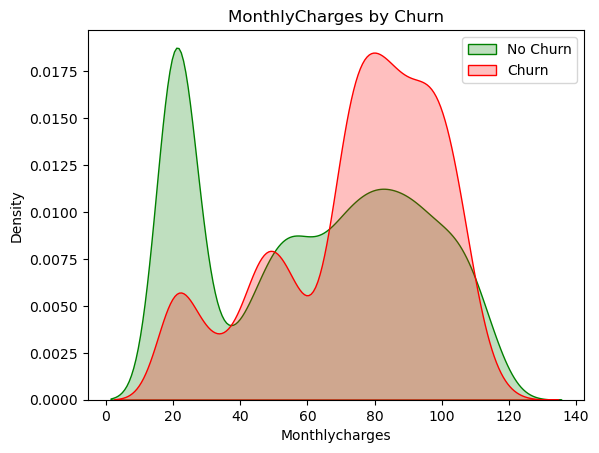

In [29]:
Mth = sb.kdeplot(df_dummy.MonthlyCharges[(df_dummy['Churn']==0)], color = "Green", fill = True)
Mth = sb.kdeplot(df_dummy.MonthlyCharges[(df_dummy['Churn']==1)],ax = Mth, color = "Red", fill = True)
Mth.legend(["No Churn", "Churn"], loc = "upper right")
Mth.set_xlabel("Monthlycharges")
Mth.set_title("MonthlyCharges by Churn")

* TotalCharges vs Churn

Text(0.5, 1.0, 'MonthlyCharge by Churn')

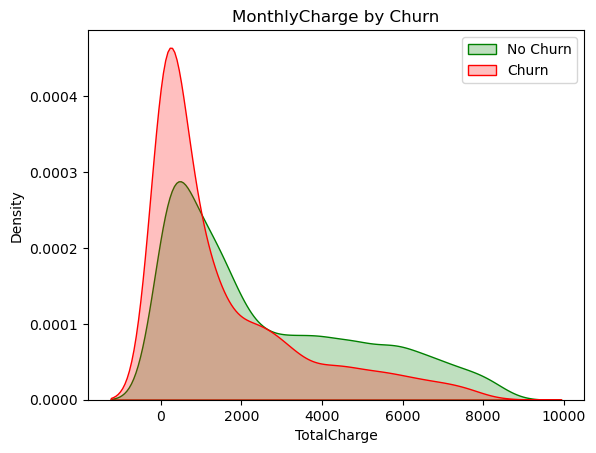

In [30]:
Bth = sb.kdeplot(df_dummy.TotalCharges[(df_dummy['Churn'] ==0)], color = 'Green', fill = True)
Bth = sb.kdeplot(df_dummy.TotalCharges[df_dummy['Churn']==1],ax=Bth, color= "Red", fill = True )
Bth.legend(['No Churn', 'Churn'], loc = 'upper right')
Bth.set_xlabel("TotalCharge")
Bth.set_title("MonthlyCharge by Churn")

<Axes: >

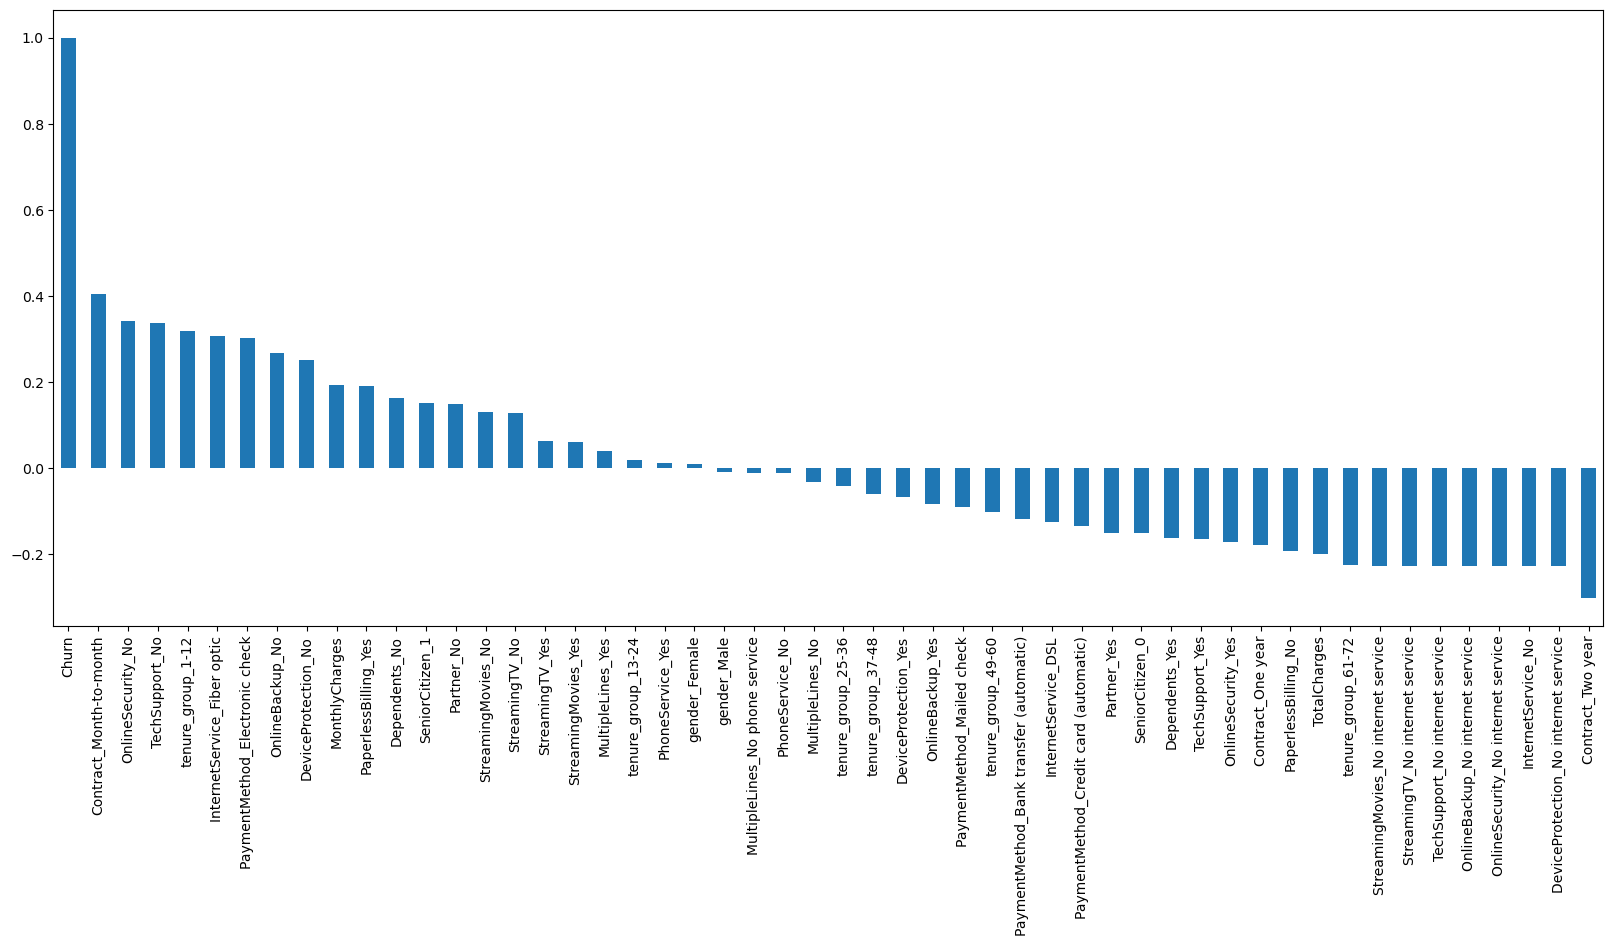

In [31]:
plt.figure(figsize = (20, 8))
df_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

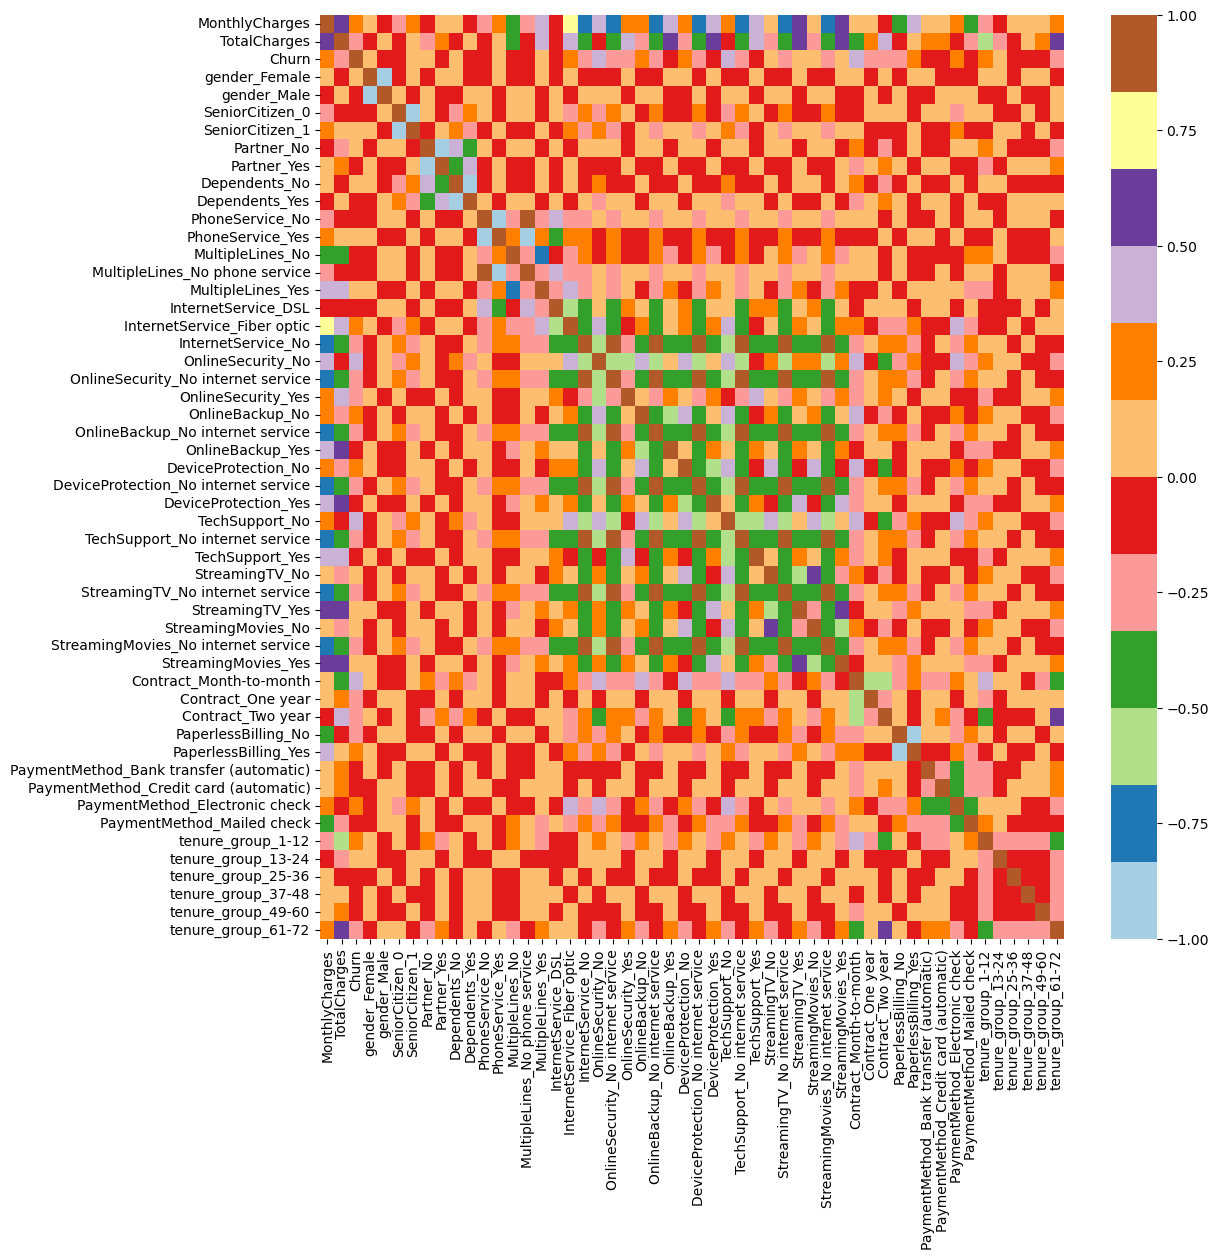

In [32]:
plt.figure(figsize=(12, 12))
sb.heatmap(df_dummy.corr(), cmap='Paired')

* **corr()** gives the correlation between all the columns in pandas dataframe
* So the Heatmap shows the correlation of each column with all columns.

In [33]:
new_df_target0 = df.loc[df['Churn']==0]
new_df_target1 = df.loc[df['Churn']==1]

In [43]:
def uniplot(df1, col, title, hue=None):
    sb.set_style('whitegrid')
    sb.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df1[col].unique()) + 4*len(temp.unique())
    fig.set_size_inches(width, 5)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sb.countplot(data = df1, x=col, order =df1[col].value_counts().index, hue = hue, palette = 'bright')
    plt.show()

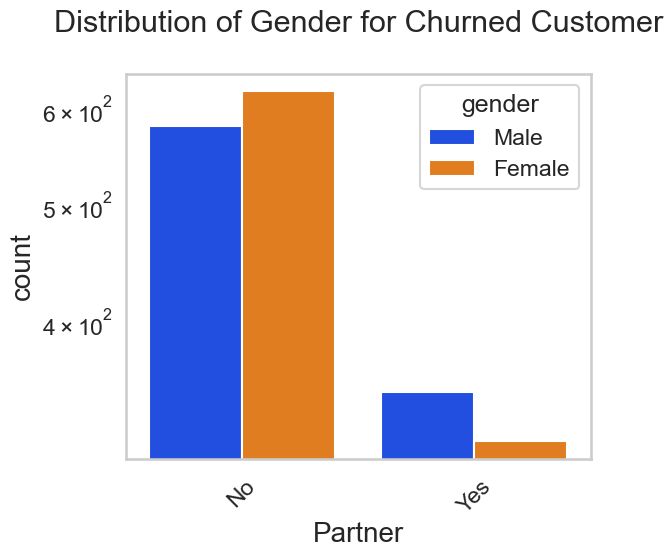

In [44]:
uniplot(new_df_target1, col = 'Partner', title ='Distribution of Gender for Churned Customer', hue ='gender')

* **Insight** Single female is more likely to Churn
* Overall singles are more likely to Churn

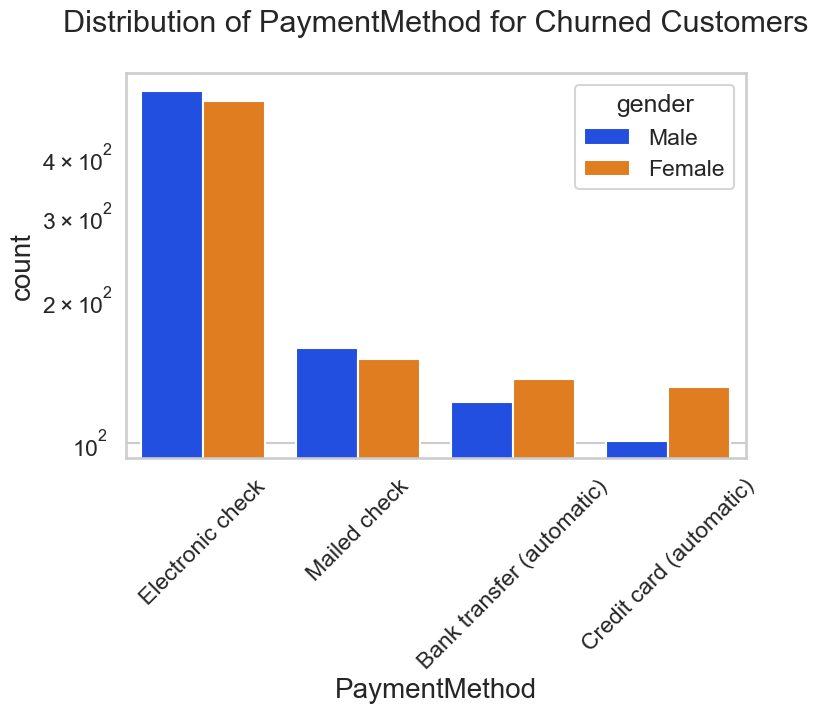

In [47]:
uniplot(new_df_target1, col='PaymentMethod', title = 'Distribution of PaymentMethod for Churned Customers', hue='gender')

* **Insight** Customers whose payment mode is "Electronic Check" is more likey to Churn

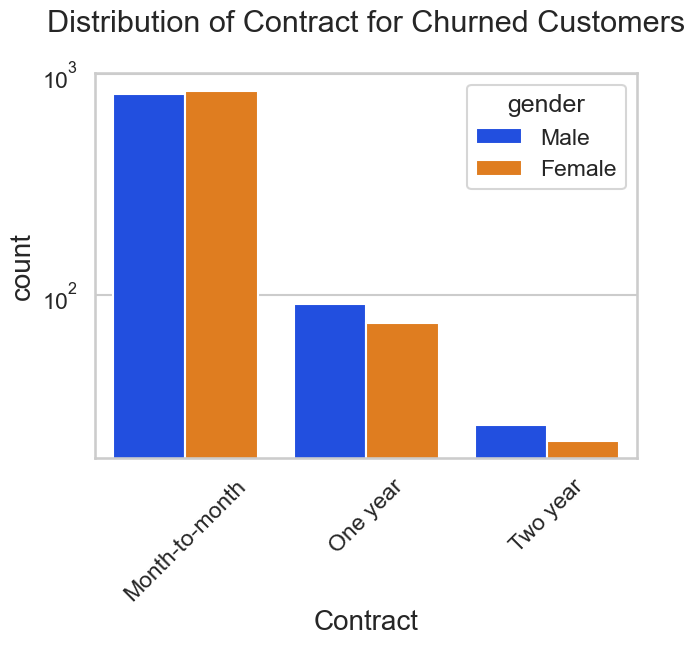

In [49]:
uniplot(new_df_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

* Month-to-Month Contract customers are more likely to churn as they are free to go after a month.

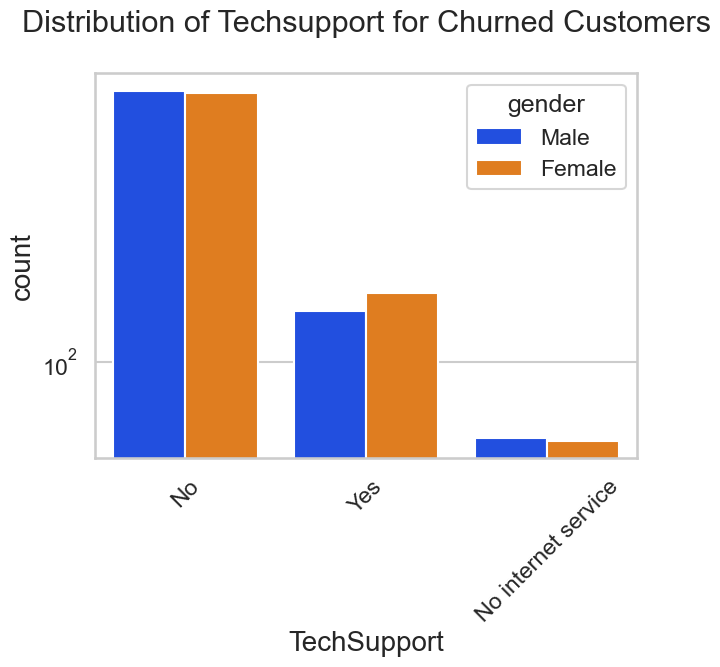

In [51]:
uniplot(new_df_target1, col='TechSupport', title='Distribution of Techsupport for Churned Customers', hue='gender')

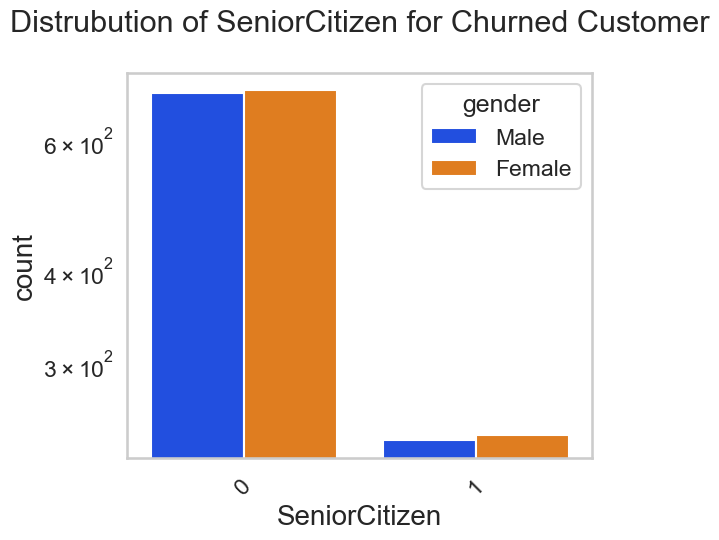

In [52]:
uniplot(new_df_target1, col='SeniorCitizen', title='Distrubution of SeniorCitizen for Churned Customer', hue='gender')

### Customers who prone to Churn:-
* Single Customers.
* Customer without TechSupport.
* Young Customers
* Customer who pay by Electronic Check.

In [53]:
df_dummy.to_csv('tel_churn.csv')